# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [14]:
df = pd.read_csv('/content/dataset_inisiasi.csv')

In [5]:
df

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction,Cluster
0,-0.971275,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537,-0.800526,3
1,0.269440,1,15,0,1.311287,0,0.305314,-0.206794,2.216472,-0.076554,2
2,-0.586882,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534,0.045675,5
3,-0.387456,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797,-0.574872,1
4,-0.973468,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589,0.967094,0
...,...,...,...,...,...,...,...,...,...,...,...
2507,1.913802,0,7,1,-0.656259,0,-0.152156,-0.206794,1.942606,-0.659492,4
2508,-0.157779,1,40,1,0.186975,0,0.819969,-0.206794,-1.245986,-0.988571,3
2509,-0.921462,1,36,1,0.636700,2,0.376794,-0.206794,-0.443928,0.440569,3
2510,-0.382420,1,10,2,-1.218415,3,-1.438793,-0.206794,-0.855705,-1.233029,4


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Memisahkan fitur (X) dan label target (y)
X = df.drop(columns=["Cluster"])  # Fitur
y = df["Cluster"]  # Target (label fraud/non-fraud berdasarkan cluster)
# Membagi dataset menjadi training dan testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [7]:
# Inisialisasi model RandomForestClassifier
model = RandomForestClassifier(random_state=42)
# Latih model
model.fit(X_train, y_train)
# Prediksi pada data uji
y_pred = model.predict(X_test)

In [8]:
# Inisiasi model Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
# Latih model Decision Tree
dt_model.fit(X_train, y_train)
# Prediksi dengan model Decision Tree
y_pred_dt = dt_model.predict(X_test)

Pada proyek klasifikasi ini, digunakan dua algoritma machine learning, yaitu **Decision Tree** dan **Random Forest**. Berikut adalah penjelasan masing-masing algoritma:  

### **1. Decision Tree**  
Decision Tree merupakan algoritma pembelajaran terawasi yang digunakan untuk tugas klasifikasi maupun regresi. Algoritma ini bekerja dengan membagi dataset ke dalam subset yang lebih kecil berdasarkan fitur yang paling informatif. Struktur pohon keputusan terdiri dari:  
- **Node Akar (Root Node):** Titik awal yang memuat keseluruhan data.  
- **Node Daun (Leaf Node):** Node yang menunjukkan hasil prediksi akhir.  
- **Cabang (Branch):** Penghubung antara node yang menunjukkan kondisi atau aturan.  

Keunggulan Decision Tree adalah interpretasi yang mudah dan kecepatan dalam membangun model. Namun, algoritma ini rentan terhadap overfitting, terutama pada data yang kompleks atau berisik.  

### **2. Random Forest**  
Random Forest merupakan pengembangan dari Decision Tree dengan melakukan ensemble learning, yaitu membentuk beberapa pohon keputusan secara acak dan menggabungkan hasil prediksi dari masing-masing pohon untuk menghasilkan prediksi akhir. Proses pembentukan Random Forest meliputi:  
- **Pembentukan Banyak Pohon:** Membangun beberapa pohon keputusan dari subset data yang berbeda.  
- **Voting Mayoritas:** Menggabungkan hasil prediksi dari semua pohon dan memilih kelas yang paling banyak diprediksi.  

Keunggulan Random Forest adalah lebih tahan terhadap overfitting dan lebih akurat dibandingkan Decision Tree, terutama pada dataset yang kompleks. Namun, kelemahannya adalah membutuhkan lebih banyak sumber daya komputasi.  

### **Kesimpulan**  
Kedua algoritma ini saling melengkapi, di mana Decision Tree cocok untuk interpretasi yang cepat, sementara Random Forest lebih andal dalam menghasilkan prediksi yang stabil. Pemilihan algoritma bergantung pada kompleksitas data dan kebutuhan interpretasi.


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [9]:
# Evaluasi model  RANDOM FOREST
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        81
           4       1.00      1.00      1.00        81
           5       1.00      1.00      1.00        85

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503

[[80  0  0  0  0  0]
 [ 0 80  0  0  0  0]
 [ 0  0 96  0  0  0]
 [ 0  0  0 81  0  0]
 [ 0  0  0  0 81  0]
 [ 0  0  0  0  0 85]]
Accuracy: 1.0


In [10]:
# Evaluasi model Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi Decision Tree: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))

Akurasi Decision Tree: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        81
           4       1.00      1.00      1.00        81
           5       1.00      1.00      1.00        85

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



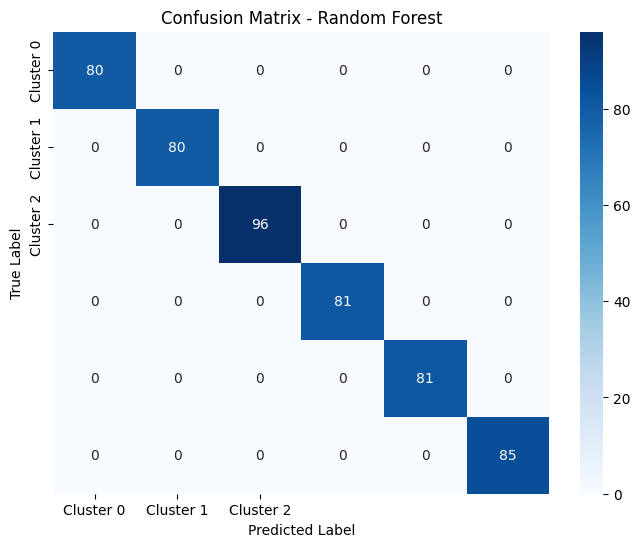

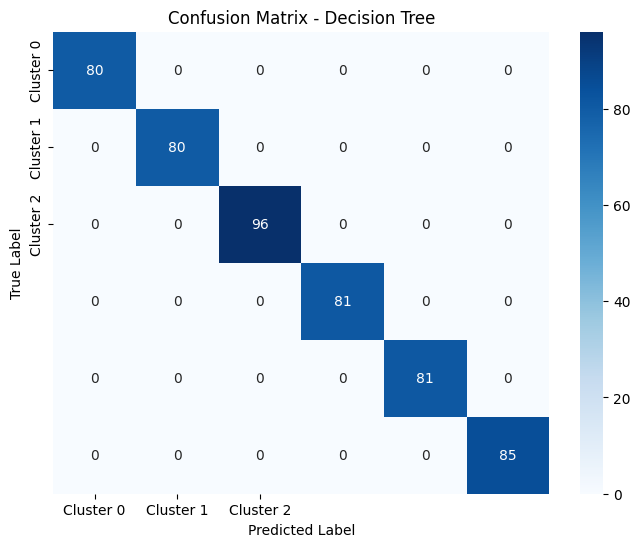

In [11]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2']) # Sesuaikan label jika jumlah cluster berbeda
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2']) # Sesuaikan label jika jumlah cluster berbeda
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [12]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [13]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

## Evaluasi Model dan Rekomendasi

### **1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan):**  
Pada kasus ini, tidak dadanya proses tuning pada model **Decision Tree** maupun **Random Forest**.  

---

### **2. Identifikasi kelemahan model:**  

**Precision atau Recall rendah untuk kelas tertentu:**  
- Pada hasil evaluasi kedua model (**Decision Tree** dan **Random Forest**), baik **precision** maupun **recall** pada semua kelas menunjukkan nilai **1.0**.  
- Artinya, tidak ada kelemahan pada kelas tertentu dalam hal prediksi.  

**Apakah model mengalami overfitting atau underfitting?**  
- Kedua model memiliki akurasi sempurna (100%), yang dapat menjadi indikasi **overfitting**, terutama pada model **Decision Tree**.  
- **Overfitting** terjadi ketika model terlalu baik dalam menangani data pelatihan sehingga kehilangan kemampuan generalisasi pada data baru.  
- **Random Forest** cenderung lebih tahan terhadap overfitting karena merupakan gabungan dari beberapa pohon keputusan (**ensemble learning**). Namun, tetap perlu dilakukan validasi silang atau pengujian dengan data baru untuk memastikan stabilitas model.  

---

### **3. Rekomendasi tindakan lanjutan:**  

**Validasi dengan Data Baru:**  
- Lakukan uji coba model pada data baru atau data dari distribusi yang berbeda untuk memastikan tidak terjadi overfitting.  
- Gunakan teknik **validasi silang (cross-validation)** untuk memastikan model dapat digeneralisasi dengan baik.  

**Tuning Hyperparameter:**  
- Jika akurasi model pada data baru menurun, lakukan tuning pada hyperparameter seperti:  
  - **Decision Tree:** Mengatur kedalaman pohon (**max_depth**), ukuran minimum sampel pada node daun (**min_samples_leaf**).  
  - **Random Forest:** Menambah jumlah pohon (**n_estimators**), mengatur fitur maksimum (**max_features**).  

**Mengumpulkan Data Tambahan:**  
- Jika model menunjukkan **overfitting**, mengumpulkan lebih banyak data dari berbagai kondisi atau skenario dapat membantu meningkatkan kemampuan generalisasi.  

**Menggunakan Algoritma Alternatif:**  
- Jika kedua model tetap menunjukkan masalah overfitting pada data baru, pertimbangkan untuk mencoba algoritma lain seperti **Gradient Boosting**, **SVM**, atau **Neural Networks** yang mungkin lebih sesuai untuk data dengan karakteristik tertentu.  
